In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

In [6]:
%config InlineBackend.rc={'figure.figsize': (12, 8)}

In [7]:
path = os.getcwd().replace('auxiliaries', 'pupil_deep/eye_test/label/teste algoritmo 2')

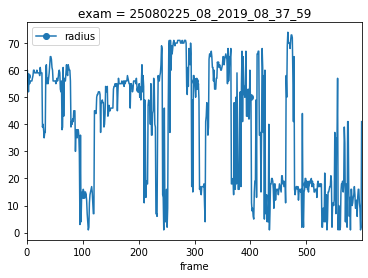

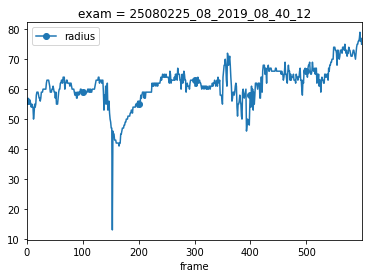

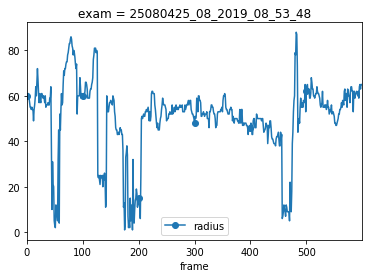

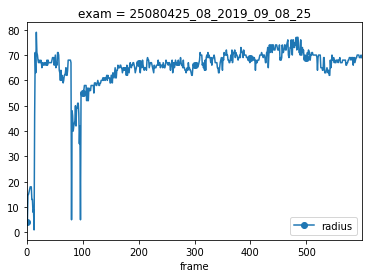

In [8]:
for file in os.listdir(path):
    if '.csv' in file:
        path_data = os.path.join(path, file)
        dataset = pd.read_csv(path_data)
        exam = file.replace('_label.csv', '')
        title = 'exam = {}'.format(exam)

        # ax = dataset.plot.line(x='frame', y=['radius', 'eye_size'],
        #                        linestyle='-', markevery=100, marker='o', title=title)

        ax = dataset.plot.line(x='frame', y='radius',
                               linestyle='-', markevery=100, marker='o', title=title)

        ax.figure.savefig('{}/graphics_{}.pdf'.format(path, exam))